<a href="https://colab.research.google.com/github/Rasna-k/flight-price-prediction/blob/main/flightpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading Data

In [ ]:
import pandas as pd

In [ ]:
url1='https://raw.githubusercontent.com/Rasna-k/flight-price-prediction/main/economy.csv'
ec=pd.read_csv(url1)

In [ ]:
url2='https://raw.githubusercontent.com/Rasna-k/flight-price-prediction/main/business.csv'
bs=pd.read_csv(url2)

In [ ]:
ec

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [ ]:
bs

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


# 2. Pre Processing Data

In [ ]:
#adding  the new feature named class
bs["class"] = "business"
ec["class"] = "economy"

## **Stacking two databases vertically**

In [ ]:
fdf=pd.concat([ec,bs],axis=0)

In [ ]:
fdf.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [ ]:
fdf.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

In [ ]:
fdf.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
class         object
dtype: object

### Merging columns

In [ ]:
fdf['num_code']=fdf['num_code'].astype('str')

In [ ]:
fdf['flight']=fdf['ch_code']+'-'+fdf['num_code']
fdf.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


### Deleting the merged columns

In [ ]:
fdf.drop(['ch_code','num_code'],axis=1,inplace=True)
fdf.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


## Renaming columns

In [ ]:
fdf.rename({"dep_time": "departure_time", "from": "source_city",
            "time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city","date":"Date of Travel"},axis=1,inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822
93483,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826
93484,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832
93485,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828


## changing datatypes

In [ ]:
fdf["Date of Travel"]=pd.to_datetime(fdf["Date of Travel"],format='%d-%m-%Y')
fdf["departure_time"]=pd.to_datetime(fdf["departure_time"],format='%H:%M')
fdf["arrival_time"]=pd.to_datetime(fdf["arrival_time"],format='%H:%M')
fdf["price"]=fdf["price"].str.replace(',','').astype(int)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight
0,2022-02-11,SpiceJet,1900-01-01 18:55:00,Delhi,02h 10m,non-stop,1900-01-01 21:05:00,Mumbai,5953,economy,SG-8709
1,2022-02-11,SpiceJet,1900-01-01 06:20:00,Delhi,02h 20m,non-stop,1900-01-01 08:40:00,Mumbai,5953,economy,SG-8157
2,2022-02-11,AirAsia,1900-01-01 04:25:00,Delhi,02h 10m,non-stop,1900-01-01 06:35:00,Mumbai,5956,economy,I5-764
3,2022-02-11,Vistara,1900-01-01 10:20:00,Delhi,02h 15m,non-stop,1900-01-01 12:35:00,Mumbai,5955,economy,UK-995
4,2022-02-11,Vistara,1900-01-01 08:50:00,Delhi,02h 20m,non-stop,1900-01-01 11:10:00,Mumbai,5955,economy,UK-963
...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,1900-01-01 09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 19:50:00,Hyderabad,69265,business,UK-822
93483,2022-03-31,Vistara,1900-01-01 12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 22:55:00,Hyderabad,77105,business,UK-826
93484,2022-03-31,Vistara,1900-01-01 07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 20:55:00,Hyderabad,79099,business,UK-832
93485,2022-03-31,Vistara,1900-01-01 07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,1900-01-01 17:00:00,Hyderabad,81585,business,UK-828


### Changing duration format into float

In [ ]:
fda=fdf['duration'].str.split('h ',expand=True)
fda

,0,1
0,02,10m
1,02,20m
2,02,10m
3,02,15m
4,02,20m
...,...,...
93482,10,05m
93483,10,25m
93484,13,50m
93485,10,00m


In [ ]:
fdf['hr']=fda.iloc[:,0]
fdf['min']=fda.iloc[:,1].str.replace('m','')
fdf['min']=fdf['min'].replace('',0,)
fdf[['hr','min']]

,hr,min
0,02,10
1,02,20
2,02,10
3,02,15
4,02,20
...,...,...
93482,10,05
93483,10,25
93484,13,50
93485,10,00


In [ ]:
fdf['min'].unique()

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', 0, '59', '24'], dtype=object)

In [ ]:
fdf['hr']=fdf['hr'].astype(float)
fdf['min']=fdf['min'].astype(float)
fdf[['hr','min']]

,hr,min
0,2.0,10.0
1,2.0,20.0
2,2.0,10.0
3,2.0,15.0
4,2.0,20.0
...,...,...
93482,10.0,5.0
93483,10.0,25.0
93484,13.0,50.0
93485,10.0,0.0


In [ ]:
fdf['duration']=(fdf['hr']+fdf['min']/60).round(2)
fdf['duration']

0         2.17
1         2.33
2         2.17
3         2.25
4         2.33
         ...  
93482    10.08
93483    10.42
93484    13.83
93485    10.00
93486    10.08
Name: duration, Length: 300261, dtype: float64

## Creating days_left column

In [ ]:
from datetime import timedelta

In [ ]:
fdf['days_left']=fdf['Date of Travel'] + timedelta(1)-min(fdf['Date of Travel'])
fdf['days_left']

0        1 days
1        1 days
2        1 days
3        1 days
4        1 days
          ...  
93482   49 days
93483   49 days
93484   49 days
93485   49 days
93486   49 days
Name: days_left, Length: 300261, dtype: timedelta64[ns]

In [ ]:
fdf['days_left'].unique()

array([  86400000000000,  172800000000000,  259200000000000,
        345600000000000,  432000000000000,  518400000000000,
        604800000000000,  691200000000000,  777600000000000,
        864000000000000,  950400000000000, 1036800000000000,
       1123200000000000, 1209600000000000, 1296000000000000,
       1382400000000000, 1468800000000000, 1555200000000000,
       1641600000000000, 1728000000000000, 1814400000000000,
       1900800000000000, 1987200000000000, 2073600000000000,
       2160000000000000, 2246400000000000, 2332800000000000,
       2419200000000000, 2505600000000000, 2592000000000000,
       2678400000000000, 2764800000000000, 2851200000000000,
       2937600000000000, 3024000000000000, 3110400000000000,
       3196800000000000, 3283200000000000, 3369600000000000,
       3456000000000000, 3542400000000000, 3628800000000000,
       3715200000000000, 3801600000000000, 3888000000000000,
       3974400000000000, 4060800000000000, 4147200000000000,
       4233600000000000]

In [ ]:
fdf['days_left']=fdf['days_left'].astype(str).str.slice(start=0,stop=2)
fdf['days_left'].unique()

array(['1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49'], dtype=object)

In [ ]:
fdf['days_left']=fdf['days_left'].astype(int)
fdf['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

## Replacing values in stops column

In [ ]:
fdf['stops'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [ ]:
fdf['stops']=fdf['stops'].str.slice(start=0,stop=1)
fdf['stops'].unique()

array(['n', '1', '2'], dtype=object)

In [ ]:
fdf['stops']=fdf['stops'].replace('n',0)
fdf['stops']=fdf['stops'].astype(int)
fdf['stops'].unique()

array([0, 1, 2])

## splitting time into zones


In [ ]:
fdf['departure_time']=(fdf['departure_time'].dt.hour % 24 +4)//4
fdf['arrival_time']=(fdf['arrival_time'].dt.hour % 24 +4)//4
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,hr,min,days_left
0,2022-02-11,SpiceJet,5,Delhi,2.17,0,6,Mumbai,5953,economy,SG-8709,2.0,10.0,1
1,2022-02-11,SpiceJet,2,Delhi,2.33,0,3,Mumbai,5953,economy,SG-8157,2.0,20.0,1
2,2022-02-11,AirAsia,2,Delhi,2.17,0,2,Mumbai,5956,economy,I5-764,2.0,10.0,1
3,2022-02-11,Vistara,3,Delhi,2.25,0,4,Mumbai,5955,economy,UK-995,2.0,15.0,1
4,2022-02-11,Vistara,3,Delhi,2.33,0,3,Mumbai,5955,economy,UK-963,2.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,3,Chennai,10.08,1,5,Hyderabad,69265,business,UK-822,10.0,5.0,49
93483,2022-03-31,Vistara,4,Chennai,10.42,1,6,Hyderabad,77105,business,UK-826,10.0,25.0,49
93484,2022-03-31,Vistara,2,Chennai,13.83,1,6,Hyderabad,79099,business,UK-832,13.0,50.0,49
93485,2022-03-31,Vistara,2,Chennai,10.00,1,5,Hyderabad,81585,business,UK-828,10.0,0.0,49


In [ ]:
fdf['departure_time'].replace([1,2,3,4,5,6],['Late Night','Early Morning','Morning','Afternoon','Evening','Night'],inplace=True)
fdf['arrival_time'].replace([1,2,3,4,5,6],['Late Night','Early Morning','Morning','Afternoon','Evening','Night'],inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,hr,min,days_left
0,2022-02-11,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,2.0,10.0,1
1,2022-02-11,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,2.0,20.0,1
2,2022-02-11,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,2.0,10.0,1
3,2022-02-11,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,economy,UK-995,2.0,15.0,1
4,2022-02-11,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,economy,UK-963,2.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,Morning,Chennai,10.08,1,Evening,Hyderabad,69265,business,UK-822,10.0,5.0,49
93483,2022-03-31,Vistara,Afternoon,Chennai,10.42,1,Night,Hyderabad,77105,business,UK-826,10.0,25.0,49
93484,2022-03-31,Vistara,Early Morning,Chennai,13.83,1,Night,Hyderabad,79099,business,UK-832,13.0,50.0,49
93485,2022-03-31,Vistara,Early Morning,Chennai,10.00,1,Evening,Hyderabad,81585,business,UK-828,10.0,0.0,49


# Cleaning Data

In [ ]:
fdf.columns

Index(['Date of Travel', 'airline', 'departure_time', 'source_city',
       'duration', 'stops', 'arrival_time', 'destination_city', 'price',
       'class', 'flight', 'days_left'],
      dtype='object')

In [ ]:
fdf.drop(columns=['hr','min'],inplace=True)
fdf.columns

KeyError: ignored

In [ ]:
fdf.shape

**There are 300261 records under 11 fields**

In [ ]:
fdf.isna().sum()

**Therefore there are no null values**

In [ ]:
fdf.duplicated().sum()

**There are 2 duplicated rows , Lets see them.**

In [ ]:
fdf.loc[fdf.duplicated(keep='first')]

**This shows the records which occur second time in the database.**

In [ ]:
fdf.drop([563,6181],axis=0,inplace=True)

In [ ]:
fdf.duplicated().sum()

# Analyzing data

In [ ]:
fdf.shape

(300257, 12)

In [ ]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300257 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date of Travel    300257 non-null  datetime64[ns]
 1   airline           300257 non-null  object        
 2   departure_time    300257 non-null  object        
 3   source_city       300257 non-null  object        
 4   duration          300257 non-null  float64       
 5   stops             300257 non-null  int64         
 6   arrival_time      300257 non-null  object        
 7   destination_city  300257 non-null  object        
 8   price             300257 non-null  int64         
 9   class             300257 non-null  object        
 10  flight            300257 non-null  object        
 11  days_left         300257 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 29.8+ MB


In [ ]:
fdf.describe()

,duration,stops,price,days_left
count,300257.000000,300257.000000,300257.000000,300257.000000
mean,12.217761,0.924215,20883.699025,26.004636
std,7.192945,0.398187,22696.003783,13.560948
min,0.830000,0.000000,1105.000000,1.000000
25%,6.750000,1.000000,4783.000000,15.000000
50%,11.250000,1.000000,7425.000000,26.000000
75%,16.170000,1.000000,42521.000000,38.000000
max,49.830000,2.000000,123071.000000,49.000000


In [ ]:
fdf["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [ ]:
fdf['airline'].value_counts()

Vistara      127858
Air India     80891
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [ ]:
fdf['class'].unique()

array(['economy', 'business'], dtype=object)

***there are 2 types of classes i.e Economy and Business***

In [ ]:
fdf.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
fdf.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

***there are 5 source and destination cities***

In [ ]:
fdf.flight.unique().shape

(1569,)

***There are 1569 unique flight numbers.***

In [ ]:
fdf.stops.unique()

array([0, 1, 2])

***There are 3 entries under stops columns-zero,one,two_or_more.***

In [ ]:
fdf.arrival_time.unique()

array(['Night', 'Morning', 'Early Morning', 'Afternoon', 'Evening',
       'Late Night'], dtype=object)

In [ ]:
fdf.select_dtypes(include='number').columns

Index(['duration', 'stops', 'price', 'days_left'], dtype='object')

In [ ]:
fdf.select_dtypes(include='object').columns

Index(['airline', 'departure_time', 'source_city', 'arrival_time',
       'destination_city', 'class', 'flight'],
      dtype='object')

In [ ]:
categorical=fdf.select_dtypes(include='object').columns
for i in categorical:
  print(fdf[categorical][i].value_counts())
  print('----------------------------------')

Vistara      127858
Air India     80891
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64
----------------------------------
Morning          75249
Evening          65415
Early Morning    62042
Night            49504
Afternoon        46857
Late Night        1190
Name: departure_time, dtype: int64
----------------------------------
Delhi        61341
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: source_city, dtype: int64
----------------------------------
Night            93584
Evening          77104
Morning          63780
Afternoon        37907
Late Night       14001
Early Morning    13881
Name: arrival_time, dtype: int64
----------------------------------
Mumbai       59106
Delhi        57361
Bangalore    51111
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: destination_city, dtype: int64
-------------------------------

In [ ]:
categorical=fdf.select_dtypes(include='number').columns
for i in categorical:
  print(fdf[categorical][i].value_counts())
  print('----------------------------------')

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2324
         ... 
40.75       1
38.50       1
42.00       1
1.01        1
41.50       1
Name: duration, Length: 479, dtype: int64
----------------------------------
1    250926
0     36043
2     13288
Name: stops, dtype: int64
----------------------------------
54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
33159       1
30786       1
15785       1
17328       1
6639        1
Name: price, Length: 12165, dtype: int64
----------------------------------
25    6633
18    6603
39    6594
32    6586
26    6577
24    6543
19    6541
33    6536
31    6535
40    6535
28    6527
41    6526
38    6513
30    6505
42    6503
20    6502
22    6495
36    6491
21    6483
37    6480
43    6473
44    6440
17    6420
11    6418
34    6412
23    6405
13    6403
29    6398
12    6385
27    6361
14    6353
15    6342
45    6314
35    6296
16    6279
46    6160
49    6157
48    6078
47    6072
10    5823
8 

# Visualizing data

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

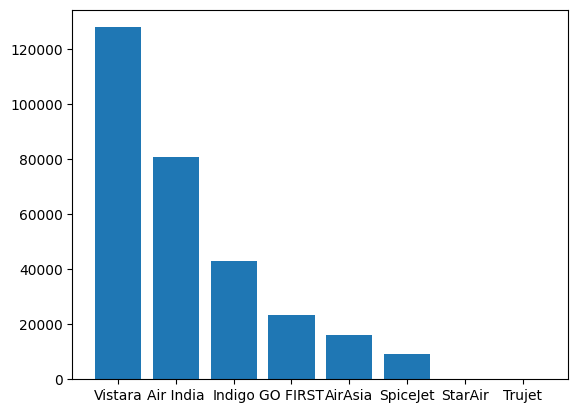

In [ ]:
plt.bar(fdf['airline'].value_counts().index,fdf['airline'].value_counts().values)

([<matplotlib.patches.Wedge at 0x7f7536d23220>,
 [Text(0.8811137838898713, 0.65851233841081, 'Delhi'),
  Text(-0.37724523815701166, 1.033288938432934, 'Mumbai'),
  Text(-1.0991922128171714, 0.04214830105817495, 'Bangalore'),
  Text(-0.6019127646008944, -0.9207068066493853, 'Kolkata'),
  Text(0.3600255176160562, -1.0394140785391022, 'Hyderabad'),
  Text(1.0110479180267034, -0.4333383290846415, 'Chennai')],
 [Text(0.4806075184853843, 0.3591885482240782, '20.43%'),
  Text(-0.2057701299038245, 0.5636121482361458, '20.28%'),
  Text(-0.5995593888093661, 0.02298998239536815, '17.35%'),
  Text(-0.3283160534186696, -0.5022037127178465, '15.44%'),
  Text(0.19637755506330337, -0.5669531337486011, '13.61%'),
  Text(0.5514806825600199, -0.23636636131889532, '12.89%')])

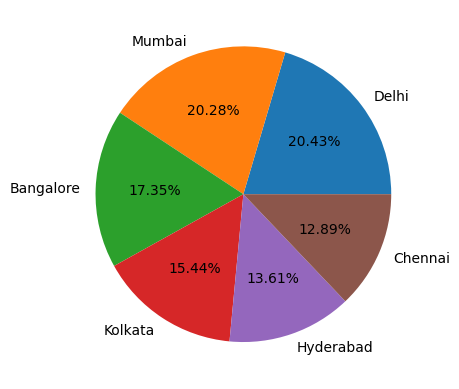

In [ ]:
plt.pie(fdf['source_city'].value_counts().values,labels=fdf['source_city'].value_counts().index,autopct='%1.2f%%')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75365783a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75365788e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7536578100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7536578e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75365790c0>],
 'means': []}

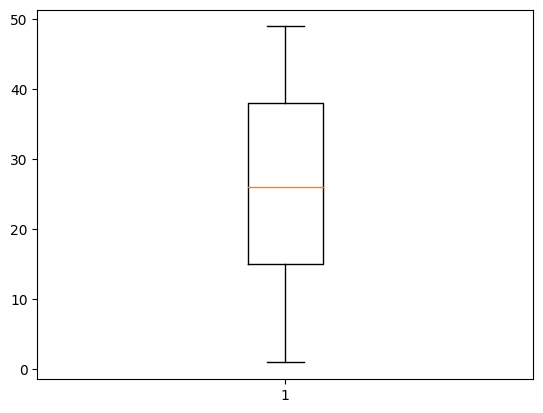

In [ ]:
plt.boxplot(fdf.days_left)

In [ ]:
import seaborn as sns

<Axes: xlabel='duration'>

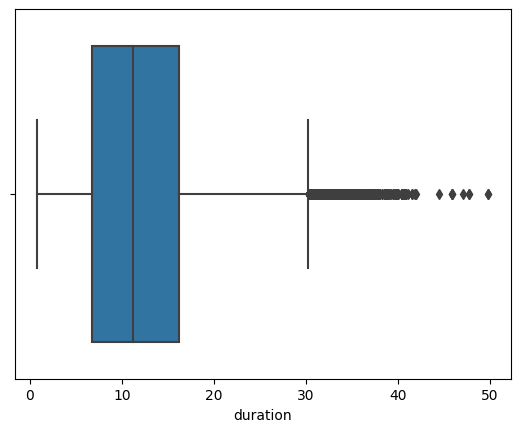

In [ ]:
sns.boxplot(fdf,x='duration')

*   Median (Q2/50th percentile): The middle value of the data set
*   First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set

*   Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
*   Interquartile Range (IQR): 25th to the 75th percentile
*   Whiskers (shown in blue)
*   Outliers (shown as green circles)
*   “maximum”: Q3 + 1.5*IQR
*  “minimum”: Q1 -1.5*IQR

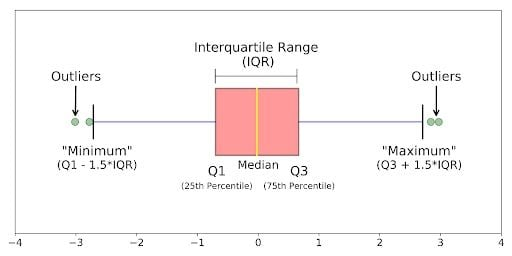

<Axes: xlabel='airline', ylabel='price'>

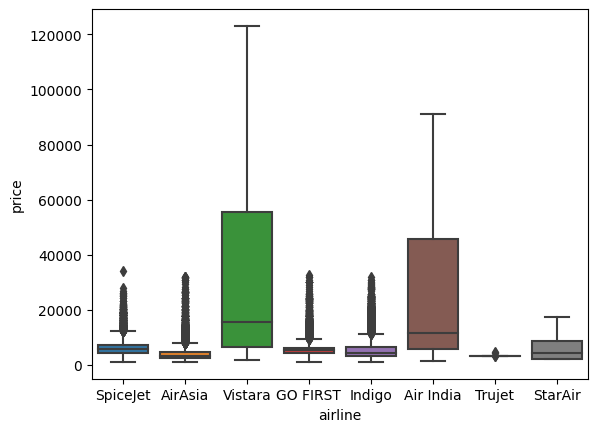

In [ ]:
sns.boxplot(fdf,x='airline',y='price')

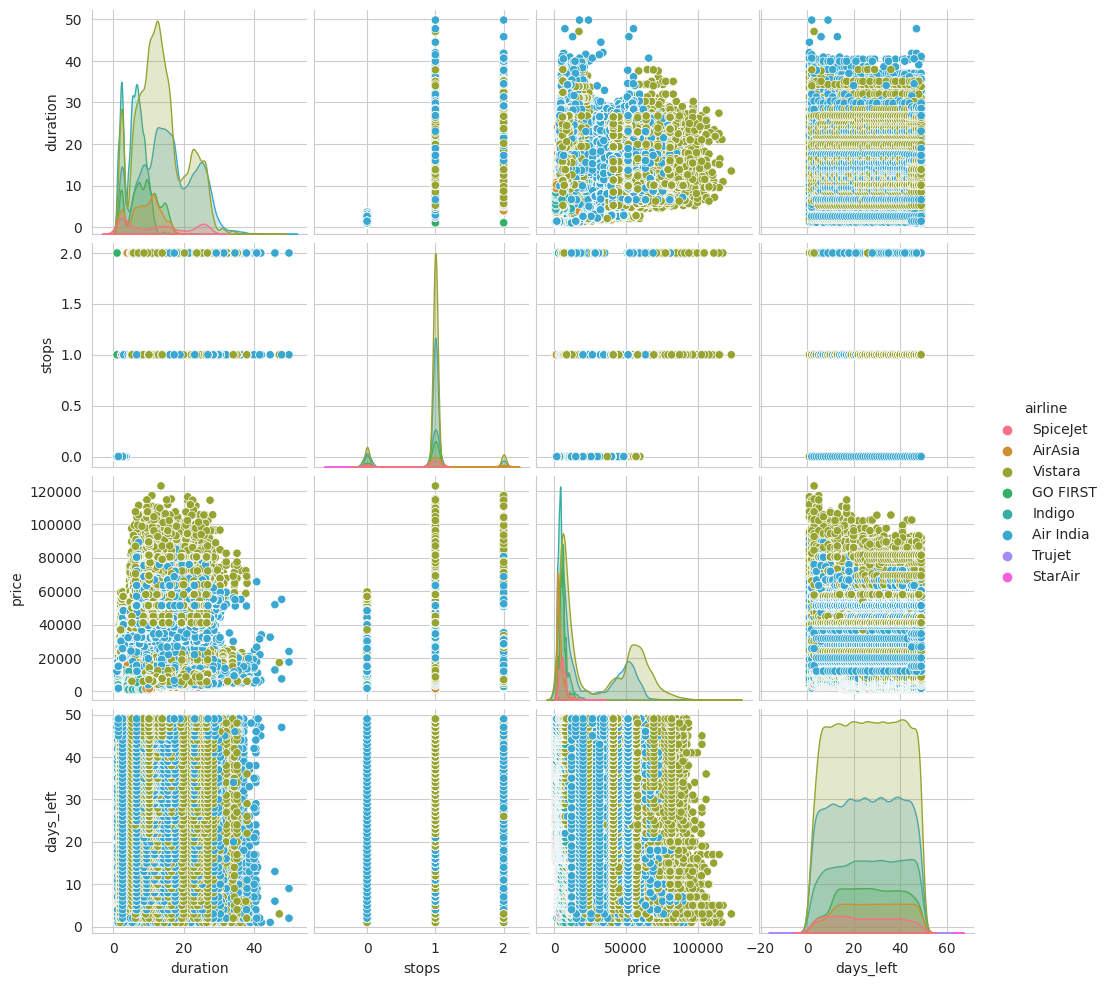

In [ ]:
sns.pairplot(fdf,hue='airline',palette='husl')

<ipython-input-259-35170990a2ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fdf.corr(),annot=True)


<Axes: >

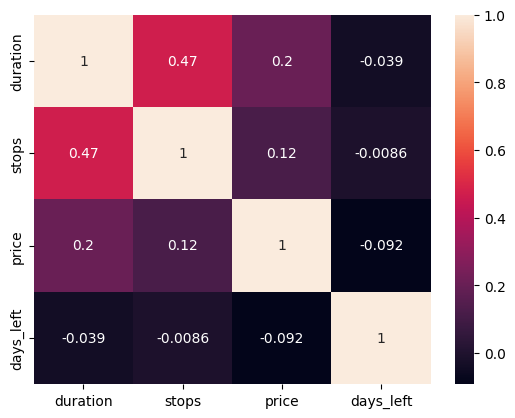

In [ ]:
sns.heatmap(fdf.corr(),annot=True)

# Questions

**does price vary with airline ?**

<BarContainer object of 300257 artists>

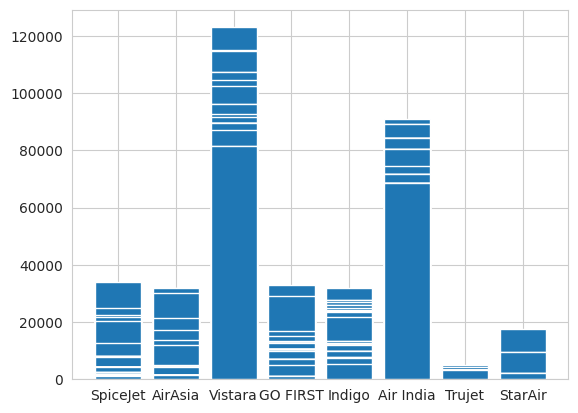

In [ ]:
plt.bar(fdf['airline'],fdf['price'])

**How is the price affected when tickets are bought in just 1 or 2 days before departure?**

<Axes: xlabel='days_left', ylabel='price'>

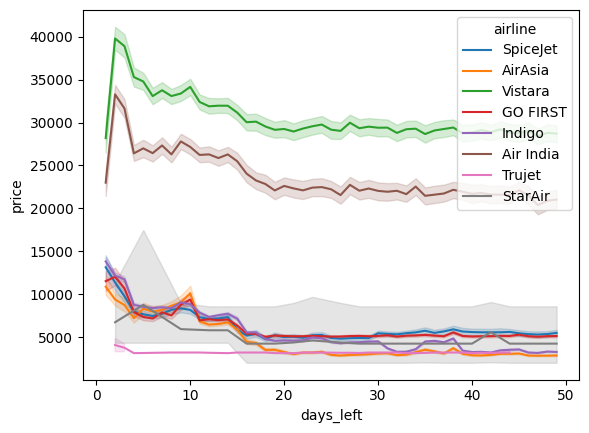

In [ ]:
sns.lineplot(fdf,x=fdf.days_left,y=fdf.price,hue='airline')

from the graph we come to know that , when days left are 1 or 2 :

*   The price gets higher for most of the airlines except for Vistara and Air India
*   for Vistara and Air India , the price gets lower in the last days.



**Does ticket price change based on the departure time and arrival time?**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Early Morning'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening'),
  Text(4, 0, 'Night'),
  Text(5, 0, 'Late Night')])

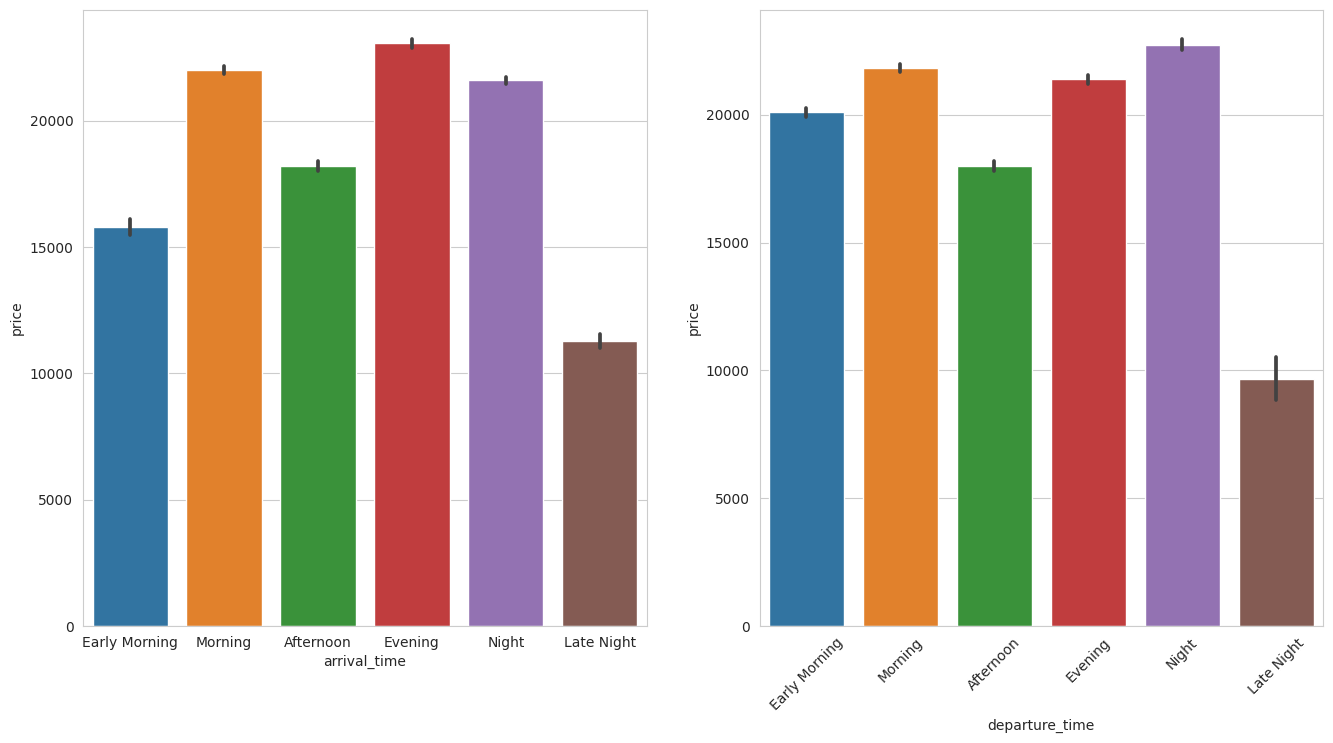

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(fdf,x='arrival_time',y='price',order=['Early Morning','Morning','Afternoon','Evening',"Night",'Late Night'])
plt.subplot(1,2,2)
sns.barplot(fdf,x='departure_time',y='price',order=['Early Morning','Morning','Afternoon','Evening',"Night",'Late Night'])
plt.xticks(rotation=45)

As we can see from the charts :
*  flights departing or arriving in late night tend to be cheaper than others.








<Axes: xlabel='price', ylabel='Density'>

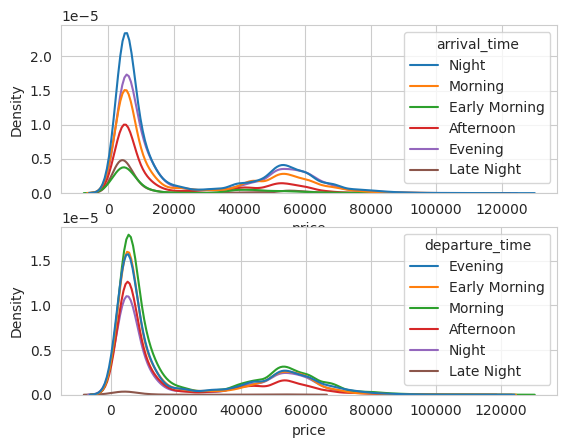

In [ ]:
plt.figure()
sns.set_style('whitegrid')
plt.subplot(2,1,1)
sns.kdeplot(fdf,x='price',hue='arrival_time')
plt.subplot(2,1,2)
sns.kdeplot(fdf,x='price',hue='departure_time')

**How the price changes with change in Source and Destination?**

<Axes: xlabel='destination_city', ylabel='price'>

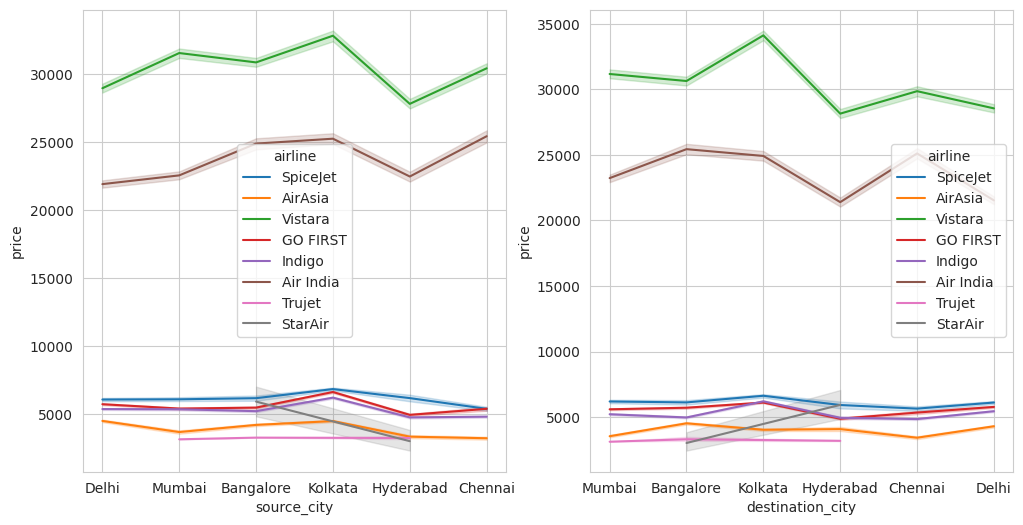

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(fdf,x='source_city',y='price',hue='airline')
plt.subplot(1,2,2)
sns.lineplot(fdf,x='destination_city',y='price',hue='airline')

**How does the ticket price vary between Economy and Business class?**

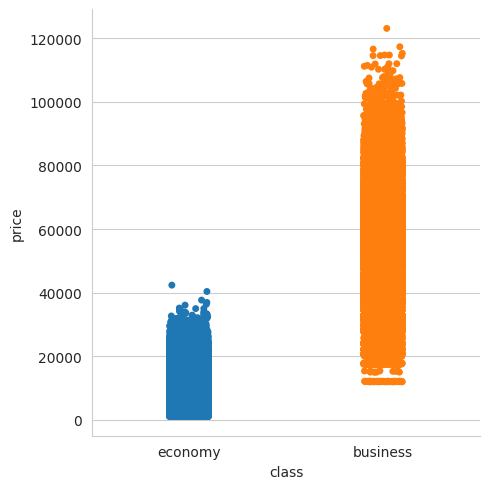

In [ ]:
sns.catplot(fdf,x='class',y='price',hue='class')

<Axes: xlabel='class', ylabel='price'>

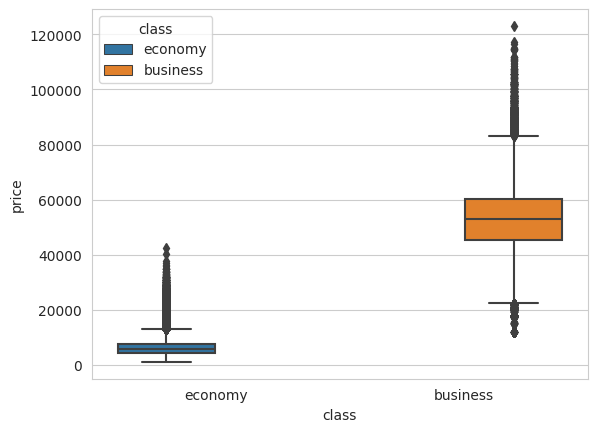

In [ ]:
sns.boxplot(fdf,x='class',y='price',hue='class')

<Axes: xlabel='price', ylabel='Density'>

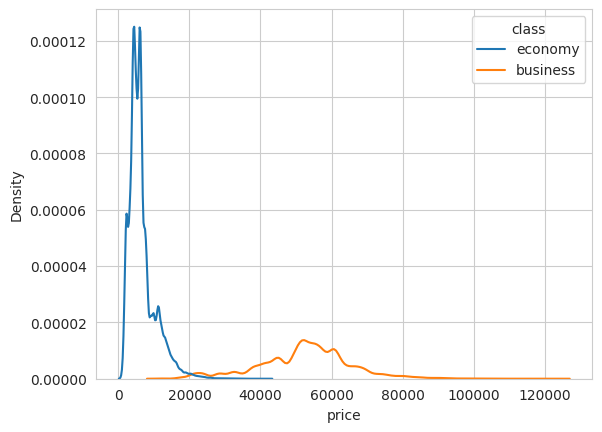

In [ ]:
sns.kdeplot(fdf,x='price',hue='class')

# Machine learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
numcols=fdf.select_dtypes(include='number').columns
numcols

Index(['duration', 'stops', 'price', 'days_left'], dtype='object')

In [ ]:
catcols=fdf.select_dtypes(include='object').columns
catcols

Index(['airline', 'departure_time', 'source_city', 'arrival_time',
       'destination_city', 'class', 'flight'],
      dtype='object')

## Converting columns into numeric

**Giving  codes to DEPARTURE TIME and ARRIVAL TIME.**


```
    1: 'Late Night',
    2: 'Early Morning',
    3: 'Morning',
    4: 'Afternoon',
    5: 'Evening',
    6: 'Night'
```



In [ ]:
fdf['departure_time'].replace(['Late Night','Early Morning','Morning','Afternoon','Evening','Night'],[1,2,3,4,5,6],inplace=True)
fdf['arrival_time'].replace(['Late Night','Early Morning','Morning','Afternoon','Evening','Night'],[1,2,3,4,5,6],inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,SpiceJet,5,Delhi,2.17,0,6,Mumbai,5953,economy,SG-8709,1
1,2022-02-11,SpiceJet,2,Delhi,2.33,0,3,Mumbai,5953,economy,SG-8157,1
2,2022-02-11,AirAsia,2,Delhi,2.17,0,2,Mumbai,5956,economy,I5-764,1
3,2022-02-11,Vistara,3,Delhi,2.25,0,4,Mumbai,5955,economy,UK-995,1
4,2022-02-11,Vistara,3,Delhi,2.33,0,3,Mumbai,5955,economy,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,3,Chennai,10.08,1,5,Hyderabad,69265,business,UK-822,49
93483,2022-03-31,Vistara,4,Chennai,10.42,1,6,Hyderabad,77105,business,UK-826,49
93484,2022-03-31,Vistara,2,Chennai,13.83,1,6,Hyderabad,79099,business,UK-832,49
93485,2022-03-31,Vistara,2,Chennai,10.00,1,5,Hyderabad,81585,business,UK-828,49


**Giving codes to SOURCE CITY and DESTINATION CITY**


```
    1: 'Delhi',
    2: 'Mumbai',
    3: 'Bangalore',
    4: 'Kolkata',
    5: 'Hyderabad',
    6: 'Chennai'
```



In [ ]:
fdf['source_city'].replace(['Delhi','Mumbai','Bangalore','Kolkata','Hyderabad','Chennai'],[1,2,3,4,5,6],inplace=True)
fdf['destination_city'].replace(['Delhi','Mumbai','Bangalore','Kolkata','Hyderabad','Chennai'],[1,2,3,4,5,6],inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,SpiceJet,5,1,2.17,0,6,2,5953,economy,SG-8709,1
1,2022-02-11,SpiceJet,2,1,2.33,0,3,2,5953,economy,SG-8157,1
2,2022-02-11,AirAsia,2,1,2.17,0,2,2,5956,economy,I5-764,1
3,2022-02-11,Vistara,3,1,2.25,0,4,2,5955,economy,UK-995,1
4,2022-02-11,Vistara,3,1,2.33,0,3,2,5955,economy,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,3,6,10.08,1,5,5,69265,business,UK-822,49
93483,2022-03-31,Vistara,4,6,10.42,1,6,5,77105,business,UK-826,49
93484,2022-03-31,Vistara,2,6,13.83,1,6,5,79099,business,UK-832,49
93485,2022-03-31,Vistara,2,6,10.00,1,5,5,81585,business,UK-828,49


**Replacing traveller class as:**

*   1:Economy
*   2:Business



In [ ]:
fdf['class'].replace(['economy','business'],[1,2],inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,SpiceJet,5,1,2.17,0,6,2,5953,1,SG-8709,1
1,2022-02-11,SpiceJet,2,1,2.33,0,3,2,5953,1,SG-8157,1
2,2022-02-11,AirAsia,2,1,2.17,0,2,2,5956,1,I5-764,1
3,2022-02-11,Vistara,3,1,2.25,0,4,2,5955,1,UK-995,1
4,2022-02-11,Vistara,3,1,2.33,0,3,2,5955,1,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,Vistara,3,6,10.08,1,5,5,69265,2,UK-822,49
93483,2022-03-31,Vistara,4,6,10.42,1,6,5,77105,2,UK-826,49
93484,2022-03-31,Vistara,2,6,13.83,1,6,5,79099,2,UK-832,49
93485,2022-03-31,Vistara,2,6,10.00,1,5,5,81585,2,UK-828,49


**Replacing airlines :**


```
1 : Vistara
2 : Air India
3 : Indigo
4 : GO FIRST
5 : AirAsia
6 : SpiceJet
7 : StarAir    
8 : Trujet
```



In [ ]:
fdf['airline'].replace(['Vistara', 'Air India' ,'Indigo','GO FIRST','AirAsia','SpiceJet','StarAir','Trujet'],[1,2,3,4,5,6,7,8],inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,6,5,1,2.17,0,6,2,5953,1,SG-8709,1
1,2022-02-11,6,2,1,2.33,0,3,2,5953,1,SG-8157,1
2,2022-02-11,5,2,1,2.17,0,2,2,5956,1,I5-764,1
3,2022-02-11,1,3,1,2.25,0,4,2,5955,1,UK-995,1
4,2022-02-11,1,3,1,2.33,0,3,2,5955,1,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,1,3,6,10.08,1,5,5,69265,2,UK-822,49
93483,2022-03-31,1,4,6,10.42,1,6,5,77105,2,UK-826,49
93484,2022-03-31,1,2,6,13.83,1,6,5,79099,2,UK-832,49
93485,2022-03-31,1,2,6,10.00,1,5,5,81585,2,UK-828,49


In [ ]:
fdf.drop('flight',axis=1,inplace=True)
fdf

,Date of Travel,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,days_left
0,2022-02-11,6,5,1,2.17,0,6,2,5953,1,1
1,2022-02-11,6,2,1,2.33,0,3,2,5953,1,1
2,2022-02-11,5,2,1,2.17,0,2,2,5956,1,1
3,2022-02-11,1,3,1,2.25,0,4,2,5955,1,1
4,2022-02-11,1,3,1,2.33,0,3,2,5955,1,1
...,...,...,...,...,...,...,...,...,...,...,...
93482,2022-03-31,1,3,6,10.08,1,5,5,69265,2,49
93483,2022-03-31,1,4,6,10.42,1,6,5,77105,2,49
93484,2022-03-31,1,2,6,13.83,1,6,5,79099,2,49
93485,2022-03-31,1,2,6,10.00,1,5,5,81585,2,49


In [ ]:
fdf.drop(columns=['duration','Date of Travel'],inplace=True)

In [ ]:
fdf.to_csv('flight.csv')

In [ ]:
sns.heatmap(fdf.corr(),annot=True)

NameError: ignored

## **Splitting Data**

In [ ]:
x=fdf.drop(columns=['flight','price','duration','Date of Travel'],axis=1)
x

,airline,departure_time,source_city,stops,arrival_time,destination_city,class,days_left
0,6,5,1,0,6,2,1,1
1,6,2,1,0,3,2,1,1
2,5,2,1,0,2,2,1,1
3,1,3,1,0,4,2,1,1
4,1,3,1,0,3,2,1,1
...,...,...,...,...,...,...,...,...
93482,1,3,6,1,5,5,2,49
93483,1,4,6,1,6,5,2,49
93484,1,2,6,1,6,5,2,49
93485,1,2,6,1,5,5,2,49


In [ ]:
y=fdf['price']
y

0         5953
1         5953
2         5956
3         5955
4         5955
         ...  
93482    69265
93483    77105
93484    79099
93485    81585
93486    81585
Name: price, Length: 300257, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=555)

In [ ]:
x_train=fdf.drop(columns=['price','flight','duration','Date of Travel'])
y_train=fdf['price']
x_test=fdf.drop(columns=['price','flight','duration','Date of Travel'])
y_test=fdf['price']

# Applying models

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
model.predict([[6,	5,	1,	0,	6,	2,	1,	1]])

**Checking accuracy**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

### CatBoost regressor

In [ ]:
!pip install catboost
import catboost as cb

In [ ]:
model1=cb.CatBoostRegressor()
model1.fit(x_train,y_train)

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
model1.predict([[6,	5,	1,	0,	6,	2,	1,	1]])

In [ ]:
r2_score(y_test,y_pred)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)